# Octave Programming Assignment: 

## Multi-class Classification and Neural Network

## 2020년 08월 17일 안상호


# 1. Multi-class Classification

20 x 20 사이즈의 손글씨 데이터를 분류해보자

In [1]:
input_layer_size  = 400;  % 20x20 Input Images of Digits
num_labels = 10;          % 10 labels, from 1 to 10
                          % (note that we have mapped "0" to label 10)


## 1.1. Dataset

In [2]:
% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

load('ex3data1.mat'); % training data stored in arrays X, y
m = size(X, 1);

Loading and Visualizing Data ...


In [3]:
size(X)

ans =

   5000    400



## 1.2. Visualizing the data

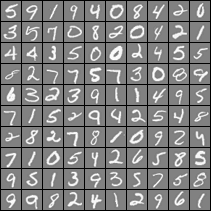

In [4]:
% Randomly select 100 data points to display
rand_indices = randperm(m);
sel = X(rand_indices(1:100), :);

displayData(sel);

## 1.3. Vectorizing Logistic Regression (`lrCostFunction.m`)

one-vs-all 이기 때문에 10개의 클래스가 존재한다면, 10개의 분리된 logistic regression classifiers를 학습시켜야 한다.

이때 작업의 효율성을 위해 Vectorizing을 잘하자

### 1.3.1 Vectorizing the cost function

$$J(\theta) = \dfrac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log{(h_{\theta}(x^{(i)}))} - (1 - y^{(i)})\log{(1 - h_{\theta}(x^{(i)}))} \right] + \dfrac{\lambda}{2m}\sum_{j=1}^{n}\theta^2$$

In [5]:
% Test case for lrCostFunction
fprintf('\nTesting lrCostFunction() with regularization');

theta_t = [-2; -1; 1; 2];
X_t = [ones(5,1) reshape(1:15,5,3)/10];
y_t = ([1;0;1;0;1] >= 0.5);
lambda_t = 3;


Testing lrCostFunction() with regularization

### 1.3.2 Vectorizing the gradient

$$
\begin{align}
&\dfrac{\partial J(\theta)}{\partial \theta_0} = \dfrac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} & \text{for} \ j = 0\\
&\dfrac{\partial J(\theta)}{\partial \theta_j} = \bigg( \dfrac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \bigg)  + \dfrac{\lambda}{m}\theta_j& \text{for} \ j \geq 1\\
\end{align}
$$


In [6]:
[J grad] = lrCostFunction(theta_t, X_t, y_t, lambda_t);

In [7]:
fprintf('\nCost: %f\n', J);
fprintf('Expected cost: 2.534819\n');
fprintf('Gradients:\n');
fprintf(' %f \n', grad);
fprintf('Expected gradients:\n');
fprintf(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n');


Cost: 2.534819
Expected cost: 2.534819
Gradients:
 0.146561 
 -0.548558 
 0.724722 
 1.398003 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


### 1.3.3. Vectorizing regularized logistic regression

- Regularization 항을 추가한다.
- 특이점: $\theta_0$ 제약 과정에 포함하지 않는다.

## 1.4. One-vs-all Classification (`oneVsAll.m`)

만들때 여러 라벨의 갯수에 대비해서 만들어야 한다는 점을 주의하자

In [8]:
fprintf('\nTraining One-vs-All Logistic Regression...\n')

lambda = 0.1;



Training One-vs-All Logistic Regression...


In [9]:
% Some useful variables
m = size(X, 1);
n = size(X, 2);

% You need to return the following variables correctly 
all_theta = zeros(num_labels, n + 1); % 10 x 401

In [10]:
% options = optimset('GradObj', 'on', 'MaxIter', 50);

% num_labels=10
% for i=1:num_labels,
%     initial_theta = zeros(n + 1, 1);
%     [theta, _] = fmincg(@(t)(lrCostFunction(t, [ones(m, 1) X], (y==i), lambda)), initial_theta, options);
  
%     all_theta(i, :) = theta';
    
% end;

In [11]:
[all_theta] = oneVsAll(X, y, num_labels, lambda);

Iteration    50 | Cost: 1.360773e-02
Iteration    50 | Cost: 5.725243e-02
Iteration    50 | Cost: 6.404586e-02
Iteration    50 | Cost: 3.597074e-02
Iteration    50 | Cost: 6.187458e-02
Iteration    50 | Cost: 2.168105e-02
Iteration    50 | Cost: 3.569188e-02
Iteration    50 | Cost: 8.587530e-02
Iteration    50 | Cost: 7.908205e-02
Iteration    50 | Cost: 9.872608e-03


### 1.4.1. One-vs-all Prediction

In [12]:
help max

'max' is a built-in function from the file libinterp/corefcn/max.cc

 -- max (X)
 -- max (X, [], DIM)
 -- [W, IW] = max (X)
 -- max (X, Y)
     Find maximum values in the array X.

     For a vector argument, return the maximum value.  For a matrix
     argument, return a row vector with the maximum value of each
     column.  For a multi-dimensional array, 'max' operates along the
     first non-singleton dimension.

     If the optional third argument DIM is present then operate along
     this dimension.  In this case the second argument is ignored and
     should be set to the empty matrix.

     For two matrices (or a matrix and a scalar), return the pairwise
     maximum.

     Thus,

          max (max (X))

     returns the largest element of the 2-D matrix X, and

          max (2:5, pi)
              =>  3.1416  3.1416  4.0000  5.0000

     compares each element of the range '2:5' with 'pi', and returns a
     row vector of the maximum values.

     For complex arguments, the

In [13]:
% h = sigmoid( * all_theta')
% h - y
h = sigmoid([1 X(1, :)] * all_theta');
[_, idx] = max(h, [], 2);
idx

idx =  10


In [14]:
pred = predictOneVsAll(all_theta, X);

fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);


Training Set Accuracy: 95.020000


# 2. Neural Network

앞선 과정에서 만든 logistic regression은 선형 분류기이기 때문에, 보다 복잡한 가설은 학습할 수 없다.

Foward Propagation만 수행하는 Neural Network를 구현해보도록 한다.

데이터는 앞부분에서 사용했던 10개의 클래스로 이루어진 5000장의 20 x 20 크기 손글씨 데이터를 사용한다.

In [15]:
%% Setup the parameters you will use for this exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
hidden_layer_size = 25;   % 25 hidden units
num_labels = 10;          % 10 labels, from 1 to 10   
                          % (note that we have mapped "0" to label 10)

Loading and Visualizing Data ...


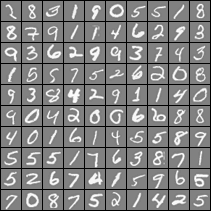

In [16]:
%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset. 
%  You will be working with a dataset that contains handwritten digits.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

load('ex3data1.mat');
m = size(X, 1);

% Randomly select 100 data points to display
sel = randperm(size(X, 1));
sel = sel(1:100);

displayData(X(sel, :));

## 2.1. Model Representation

기존에 학습되어 있던 parameter를 읽어온다.

In [17]:
%% ================ Part 2: Loading Pameters ================
% In this part of the exercise, we load some pre-initialized 
% neural network parameters.

fprintf('\nLoading Saved Neural Network Parameters ...\n')

% Load the weights into variables Theta1 and Theta2
load('ex3weights.mat');
% The matrices Theta1 and Theta2 will now be in your Octave
% environment
% Theta1 has size 25 x 401
% Theta2 has size 10 x 26


Loading Saved Neural Network Parameters ...


## 2.2. Feedforward Propagation and Prediction

- $\Theta_1$ (25 x 401): (25개의 히든레이어 유닛수 $a^{(2)}$) x (400개의 입력 + 1 $a^{(1)}$)
- $\Theta_2$ (10 x 26): (10개의 출력 유닛수 $a^{(3)}$) x (25개의 유닛 + 1 $a^{(2)}$)

In [40]:
a2 = sigmoid([ones(m, 1) X] * Theta1');
a3 = sigmoid([ones(m, 1) a2] * Theta2'); 

size(a3);
[_, iw] = max(a3, [], 2);



ans =

   5000      1



In [41]:
%% ================= Part 3: Implement Predict =================
%  After training the neural network, we would like to use it to predict
%  the labels. You will now implement the "predict" function to use the
%  neural network to predict the labels of the training set. This lets
%  you compute the training set accuracy.

pred = predict(Theta1, Theta2, X);

fprintf('\nTraining Set Accuracy: %f\n', mean(double(pred == y)) * 100);


Training Set Accuracy: 97.520000
